## Images (matrices of pixel)

- A lot of our data comes from images
  
[Video tutorial](https://youtu.be/Z78zbnLlPUA?list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&t=240)
[video series on OpenCV](https://www.youtube.com/watch?v=Z78zbnLlPUA&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Basic opencv operations
Source: [medium tutorial](https://medium.com/@yukunpengba/comprehensive-python-opencv-tutorial-for-beginners-part-i-fd0293d52241)

#### Playing with apples
![](images/red_apple.jpeg)

<class 'numpy.ndarray'> (240, 210, 3)


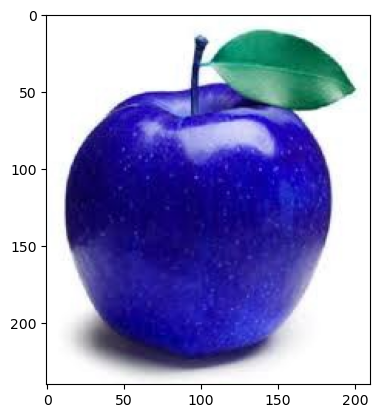

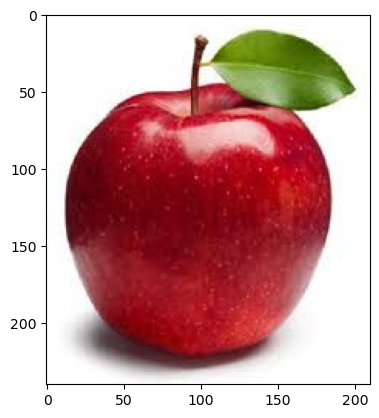

In [2]:
# Opencv uses the bgr format, while matplotlib uses rgb
img = cv2.imread('images/red_apple.jpeg')   # Read the image
print(type(img),img.shape)
plt.imshow(img)   # Ploting the image using matplotlib
plt.figure()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


In [3]:
# Another way to display the image and to close the window when "escape button" = key 27 is pressed
# remember to run: `xhost +`

#def show_image(title, img):
#    cv2.imshow("image",img)
#    key = cv2.waitKey(0)  # wait zero seconds
#    if key == 27:
#        cv2.destroyAllWindows()
#        
#show_image("Juicy apple",img)

In case you do not want to plot a picture inlined but open an external image viewer, you can use the `cv2.imshow("Image Name", img)`


## Resizing an Image

You can use various interpolation mechanisms when resizing. OpenCV is really well documented and you can find more on `cv2.resize`'s interpolation options here: http://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#resize

In [4]:
def read(path, switch_channels=True):
    """Read image pixel data from file
    Args:
    path (string): path to image on disk
    switch_channels (bool): if true changes the channels from bgr to rgb (used by matplotlib)"""
    image = cv2.imread(path)
    if switch_channels:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [5]:
def resize(image, new_x_dim):
    """Reduces the amount of pixels
    Args:
    image (ndarray): the pixel cube
    nex_x_dim (int): new number of columns"""
    ratio = new_x_dim / image.shape[1]
    new_y_dim = int(image.shape[0] * ratio)
    dim = (new_x_dim, new_y_dim)
    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized_image

In [6]:
def create_plot(image, title=''):
    plt.imshow(image, interpolation='none')
    plt.title(title)
    plt.axis('off')
    return plt

### original
<img src="./data/mare-08.jpg">

(15, 20, 3)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

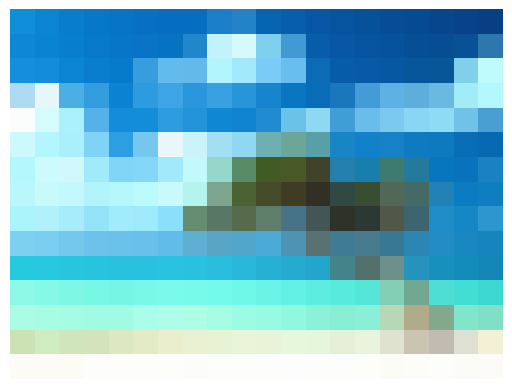

In [7]:
#image_path = './jurassic-park-tour-jeep.jpg'
image_path = './data/mare-08.jpg'

img = read(image_path)
img_small = resize(img, 20)
print(img_small.shape)
create_plot(img_small)

## Drawing shapes with opencv

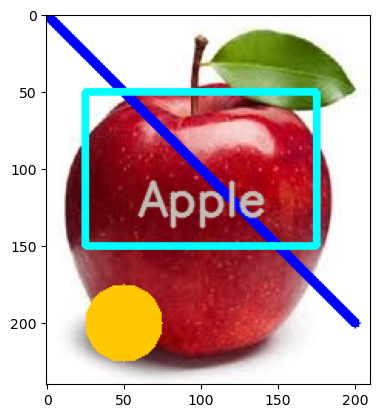

In [8]:
draw_img = img_rgb.copy()        # Make a copy of the image
cv2.line(draw_img,(0,0),(200,200),(0,0,255),5)   # Draw the line
cv2.rectangle(draw_img,(25,50),(175,150),(0,255,255),3)
cv2.circle(draw_img,(50,200), radius=25, color=(255,200,0), thickness=-1) # negative thickness makes circle filled
font = cv2.FONT_HERSHEY_SIMPLEX 
textcolor = (196,188,180)
cv2.putText(draw_img,'Apple',(60,130),font, 1,textcolor,2,cv2.LINE_AA)             
plt.imshow(draw_img)    # show the image

## Detecting Objects in an Image

#### Find the yellow ball
Using Edge detection and contours. To locate points in images where the color or brightness have great changes.

In [9]:
#!wget -O data/selena.jpg https://i.pinimg.com/236x/e8/aa/50/e8aa50b2f8a65d30c0ef0ffe8f8dc7b0--sport-tennis-female-athletes.jpg

In [10]:
!ls -la data/selena*

-rw-r--r-- 1 jovyan users 14766 Jan 31 12:06 data/selena.jpg
-rw-r--r-- 1 jovyan users 20359 Jan 31 12:06 data/selena-obj-detected.jpg


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

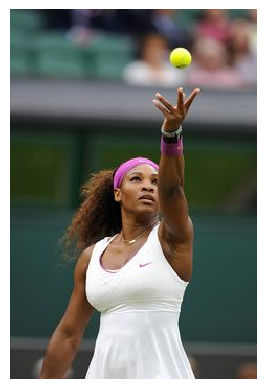

In [11]:
image_path = './data/selena.jpg'

img = read(image_path)
create_plot(img)

## Color Spaces

We have seen the RGB color space so far, where three channels contain the information about how much red, green, and blue contribute to the color of a pixel.

A disadvantage with the RGB color space is, that pixel values change quite a lot for the same color under different light conditions. (eg the sunny side of the tennis ball vs the shadow side)

Alternatives to the RGB color space are for example the HSV (Hue, Saturation, Value) color space and the LAB color space, where *L* stands for lightness and *a* and *b* for the color opponents green–red and blue–yellow.

![](images/HSV.png)


![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/CIELAB_color_space_top_view.png/497px-CIELAB_color_space_top_view.png)


Using the HSV color space, we can find for example the tennis ball quite easily. We create a mask for a certain range of color values, which are characterisitc for a tennis ball.

### [Color picker](https://colorpicker.me/#bfff00)

cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (354, 236, 3) and mask shape: (354, 236)
 mask contains: [  0 255] which is good cause object to be found should be white and background should be black.


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

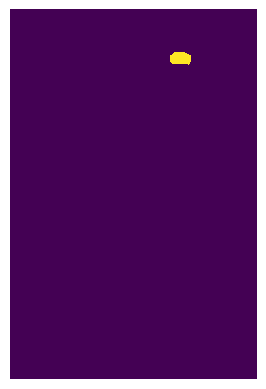

In [12]:
def create_ball_mask(image):
    """From an image create a HSV mask by identifying lower and upper bounds of the three values"""
    # Color values in HSV
    green_lower = (20, 100, 180) # hsv (0-360, 0-255, 0-255) sometimes written as (0-360, 100%, 100%)
    green_upper = (60, 255, 255)

    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
 
    mask = cv2.inRange(hsv_img, green_lower, green_upper) # inRange: exclude all pixels outside of range
    mask = cv2.dilate(mask, None, iterations=2)           # dilate: (like pupils) expand pixels around the center
    mask = cv2.erode(mask, None, iterations=2)            # erode: opposite of dilate. remove pixels from outer layer
    print(f'cv2.inRange(img,lower,higher){type(mask)} Image shape: {image.shape} and mask shape: {mask.shape}\n mask contains: {np.unique(mask)} which is good cause object to be found should be white and background should be black.')
    
    return mask
create_plot(create_ball_mask(img))

In [13]:
cv2.__version__

'4.7.0'

## Finding contours
Lets look at an image like this:
![]()


In [14]:
def mark_object(image, mask):
    """find the largest contour in the mask, then use it to compute the minimum enclosing circle and centroid"""
    # Finds contours in a binary image. The contours are a useful tool for shape analysis and object detection and recognition.
    contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

    c = max(contours, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv2.circle(image, center=(int(x), int(y)), radius=int(radius), color=(255, 0, 0), thickness=3)
    return image

In [15]:
mask = create_ball_mask(img)
img = mark_object(img, mask)
img_converted = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('./data/selena-obj-detected.jpg', img_converted)
#cv.show()


cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (354, 236, 3) and mask shape: (354, 236)
 mask contains: [  0 255] which is good cause object to be found should be white and background should be black.


True

![](./data/selena-obj-detected.jpg)

In [16]:
%%bash
wget -O data/1.jpg http://media.npr.org/assets/img/2016/12/20/ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg

--2023-04-18 09:20:28--  http://media.npr.org/assets/img/2016/12/20/ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg
Resolving media.npr.org (media.npr.org)... 23.77.251.124, 2a02:26f0:116:197::1155, 2a02:26f0:116:19a::1155
Connecting to media.npr.org (media.npr.org)|23.77.251.124|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://media.npr.org/assets/img/2016/12/20/ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg [following]
--2023-04-18 09:20:29--  https://media.npr.org/assets/img/2016/12/20/ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg
Connecting to media.npr.org (media.npr.org)|23.77.251.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘data/1.jpg’

     0K .......... .......... .......... .......... ..........  152K
    50K .......... .......... .......... ..                     429K=0.4s

2023-04-18

![](data/1.jpg)

cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (675, 900, 3) and mask shape: (675, 900)
 mask contains: [  0 255] which is good cause object to be found should be white and background should be black.
cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (675, 900, 3) and mask shape: (675, 900)
 mask contains: [  0 255] which is good cause object to be found should be white and background should be black.


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

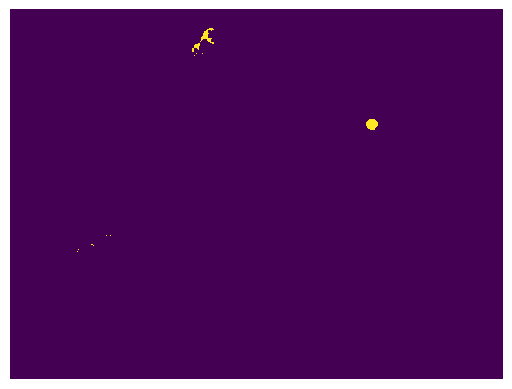

In [17]:
image_path = 'data/1.jpg'

img = read(image_path)
mask = create_ball_mask(img)
img = mark_object(img, mask)

cv2.imwrite('./obj-detected.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
create_plot(create_ball_mask(img))

True False


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

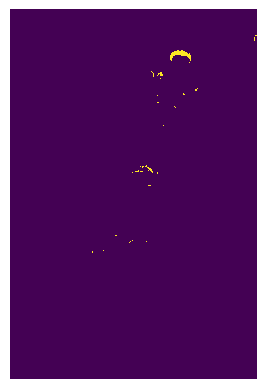

In [18]:
image_path = './data/selena.jpg'

img = read(image_path)

green_lower = (200, 180, 70)
green_upper = (255, 255, 175)
 
# construct a mask for the color "green", then perform
# a series of dilations and erosions to remove any small
# blobs left in the mask
mask = cv2.inRange(img, green_lower, green_upper)

print(mask.any(), mask.all())
create_plot(mask)

## Another example of finding contours  
#### Steps
1. Read image as grey scale image.
2. Use cv2.threshold() function to obtain the threshold image.
3. Use cv2.findContours() and pass the threshold image and necessary parameters.
4. findContours() returns contours. You can draw it on the original image or a blank image.

source: <img src='images/flamenco_dance.jpg' width=200>

## Thresholding
Image thresholding is used to binarize the image based on pixel intensities. The input to such thresholding algorithm is usually a grayscale image and a threshold (value to devide greyscale pixels to either zero or one). The output is a binary image.

In [19]:
import cv2
import numpy as np
img_loc = 'images/flamenco_dance.jpg'
# 1
img = cv2.imread(img_loc, cv2.IMREAD_UNCHANGED)
print(img.shape)
# 2
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_grey.shape)
# 3
thresh = 200 # the lower the threshhold the more details we get
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
# 4
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

(7966, 5311, 3)
(7966, 5311)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


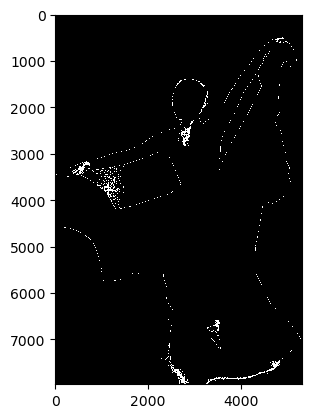

In [20]:
# Draw the contours
import matplotlib.pyplot as plt
#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (255,255,255), 3)
#save image
cv2.imwrite('data/flamenco_contours.png',img_contours) 
plt.imshow(img_contours, interpolation='none')

In [21]:
!ls data/flam*

data/flamenco_contours.png


### Contours
<img src='data/flamenco_contours.png'>

## Detecting number of shapes
Example inspired from [Stackoverflow example](https://stackoverflow.com/questions/51400374/image-card-detection-using-python)
<img src="images/mixed_cards.jpg" width=300>

Image shape (705, 1028, 3) Thresh (705, 1028) [  0 254 255]
There are 6 cards


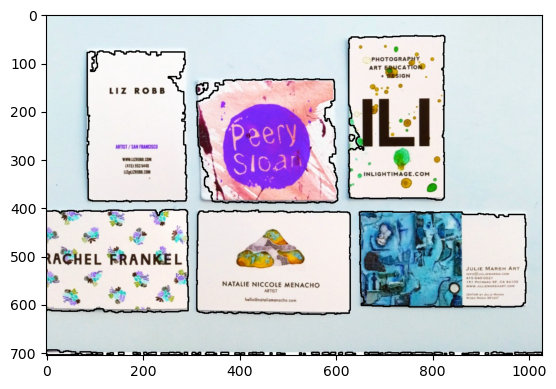

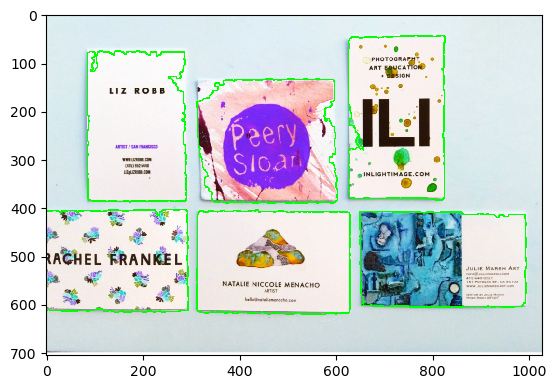

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/mixed_cards.jpg', 1)

# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
main_contours = []
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)
        main_contours.append(c)

plt.imshow(im2, interpolation='none')
print(f'There are {count} cards')

## Tesseract

In [26]:
! pip install pytesseract
# also do:
# docker exec -u 0 -it notebookserver bash
# apt install tesseract-ocr -y
# apt install tesseract-ocr-dan # to get danish language training

In [27]:
import pytesseract
tesseract_cmd = r'/usr/bin/tesseract' # point to the installation of tesseract binary

In [28]:
print(pytesseract.get_languages(config=''))

['dan', 'eng', 'osd']


In [29]:
print(main_contours[1])

[[[434 405]]

 [[434 406]]

 [[433 407]]

 ...

 [[437 405]]

 [[436 405]]

 [[435 405]]]


In [30]:
mask1 = np.zeros_like(img)
cv2.drawContours(mask1, contours=[main_contours[1]], contourIdx=-1, color=(0,0,0),thickness=2, lineType=cv2.FILLED)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [31]:
out = np.zeros_like(img) # Extract out the object and place into output image
out[mask1 > 0] = img[mask1 > 0]
# Show the output image


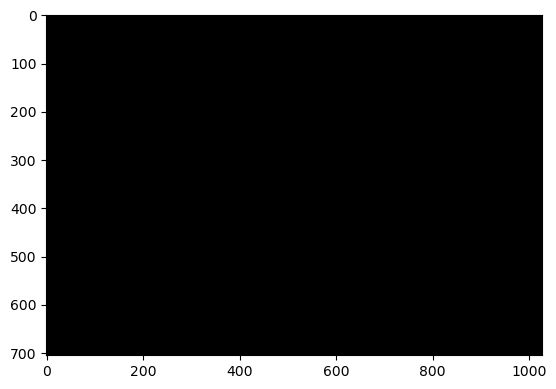

In [32]:
plt.imshow(out)
# plt.figure()